In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import plotly.express as px

In [53]:
df_expectativa_vida = pd.read_csv('./dataset/expectativa_vida.csv', sep=',')

df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

df_expectativa_vida.rename(columns={'Period': 'Year'}, inplace=True)

In [54]:
# Separando os dados com base no indicador - Expectativa de vida ao nascer
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()

,Indicator,ParentLocation,Country,Year,Dim1,Value
2,Life expectancy at birth (years),Africa,Lesotho,2019,Both sexes,50.75
3,Life expectancy at birth (years),Africa,Central African Republic,2019,Both sexes,53.10
10,Life expectancy at birth (years),Eastern Mediterranean,Somalia,2019,Both sexes,56.47
13,Life expectancy at birth (years),Africa,Eswatini,2019,Both sexes,57.73
15,Life expectancy at birth (years),Africa,Mozambique,2019,Both sexes,58.14


In [55]:
# Separando os dados com base no indicador - Expectativa de vida aos 60 anos
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']
df_expectativa_aos_60.head(300)

,Indicator,ParentLocation,Country,Year,Dim1,Value
553,Life expectancy at age 60 (years),Africa,Central African Republic,2019,Both sexes,13.17
556,Life expectancy at age 60 (years),Africa,Lesotho,2019,Both sexes,13.43
558,Life expectancy at age 60 (years),Western Pacific,Kiribati,2019,Both sexes,13.69
564,Life expectancy at age 60 (years),Eastern Mediterranean,Somalia,2019,Both sexes,14.54
568,Life expectancy at age 60 (years),Western Pacific,Micronesia (Federated States of),2019,Both sexes,14.70
...,...,...,...,...,...,...
1979,Life expectancy at age 60 (years),Europe,Lithuania,2015,Both sexes,20.32
1981,Life expectancy at age 60 (years),Europe,Latvia,2015,Both sexes,20.35
1985,Life expectancy at age 60 (years),Americas,Antigua and Barbuda,2015,Both sexes,20.43
1990,Life expectancy at age 60 (years),Western Pacific,China,2015,Both sexes,20.58


In [56]:
# Carregar o DataFrame a partir do arquivo CSV
df_gini = pd.read_csv('./dataset/economic-inequality-gini-index.csv')

df_gini


,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605
...,...,...,...,...
2120,Zambia,ZMB,2010,0.556215
2121,Zambia,ZMB,2015,0.571361
2122,Zimbabwe,ZWE,2011,0.431536
2123,Zimbabwe,ZWE,2017,0.443371


In [57]:
df_gini.rename(columns={'Entity': 'Country'}, inplace=True)
gini_merge = pd.merge(df_expectativa_ao_nascer, df_gini, on=['Year','Country'], how="inner")
gini_merge = gini_merge.drop("Code", axis=1)
gini_merge_2010 = gini_merge.query("Year == 2010").reset_index().drop("index", axis=1)
gini_merge_2010.head(10)

,Indicator,ParentLocation,Country,Year,Dim1,Value,Gini coefficient
0,Life expectancy at birth (years),Africa,Guinea-Bissau,2010,Both sexes,55.43,0.506642
1,Life expectancy at birth (years),Africa,Zambia,2010,Both sexes,56.67,0.556215
2,Life expectancy at birth (years),Africa,Malawi,2010,Both sexes,56.80,0.454760
3,Life expectancy at birth (years),Africa,South Africa,2010,Both sexes,57.14,0.633832
4,Life expectancy at birth (years),Africa,Nigeria,2010,Both sexes,59.24,0.356502
5,Life expectancy at birth (years),Africa,Gambia,2010,Both sexes,62.42,0.435684
6,Life expectancy at birth (years),Eastern Mediterranean,Pakistan,2010,Both sexes,62.64,0.287809
7,Life expectancy at birth (years),Africa,Madagascar,2010,Both sexes,62.79,0.424175
8,Life expectancy at birth (years),Africa,Ethiopia,2010,Both sexes,62.92,0.331706
9,Life expectancy at birth (years),Africa,Rwanda,2010,Both sexes,64.44,0.472224


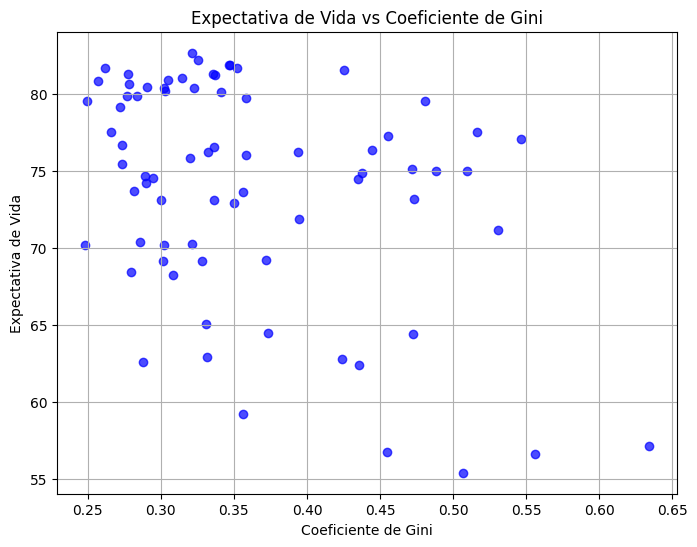

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(gini_merge_2010["Gini coefficient"], gini_merge_2010["Value"], color='b', alpha=0.7)
plt.title('Expectativa de Vida vs Coeficiente de Gini')
plt.xlabel('Coeficiente de Gini')
plt.ylabel('Expectativa de Vida')
plt.grid(True)
plt.show()

Em geral, quanto menor o coeficiente de Gini, ou seja, quanto mais a renda está bem distribuida, maior é a expectativa de vida. Mas podem ter excessões também, como mostra o menor ponto de expectativa de vida. Isso implica que existem outros valores que podem alterar a expectativa de vida de um local

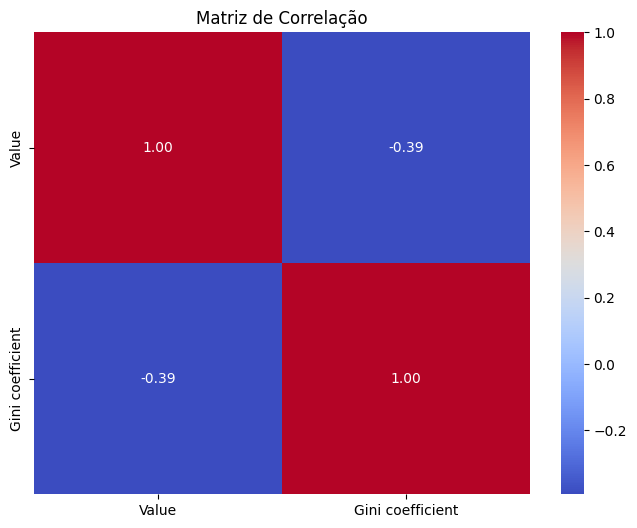

In [80]:
gini_matriz = gini_merge.drop(["Indicator", "ParentLocation", "Country", "Year", "Dim1"], axis=1)

matriz_correlacao = gini_matriz.corr()

plt.figure(figsize=(8, 6))

# Plotar a matriz de correlação usando heatmap
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")

# Adicionar título ao gráfico
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()

In [65]:
df_pib = pd.read_csv('./dataset/pib.csv')

df_pib = df_pib[["Country Name","2000","2010","2015","2019"]]

df_pib.rename(columns={'Country Name': 'Country'}, inplace=True)

df_pib

,Country,2000,2010,2015,2019
0,Africa Eastern and Southern,2.840000e+11,8.470000e+11,9.200000e+11,1.010000e+12
1,Africa Western and Central,1.400000e+11,5.920000e+11,7.610000e+11,7.950000e+11
2,Australia,4.160000e+11,1.150000e+12,1.350000e+12,1.390000e+12
3,Austria,1.970000e+11,3.920000e+11,3.820000e+11,4.450000e+11
4,Burundi,8.704861e+08,2.032135e+09,3.104395e+09,2.631434e+09
...,...,...,...,...,...
115,St. Vincent and the Grenadines,3.962630e+08,6.812259e+08,7.554000e+08,8.250407e+08
116,World,3.380000e+13,6.650000e+13,7.510000e+13,8.760000e+13
117,South Africa,1.520000e+11,4.170000e+11,3.470000e+11,3.880000e+11
118,Zambia,3.600683e+09,2.026556e+10,2.125122e+10,2.330867e+10


In [66]:
# Pivotando o dataframe para transformar a coluna 'Period' em colunas separadas para os anos desejados
df_expectativa_vida2 = df_expectativa_vida.pivot_table(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Year', values='Value').reset_index()

df_expectativa_vida2 = df_expectativa_vida2[['Indicator', 'ParentLocation', 'Country', 'Dim1', 2000, 2010, 2015, 2019]]
df_expectativa_vida2.head()

Year,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
1,Life expectancy at age 60 (years),Africa,Algeria,Female,20.25,21.85,22.33,22.62
2,Life expectancy at age 60 (years),Africa,Algeria,Male,19.36,20.89,21.33,21.53
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
4,Life expectancy at age 60 (years),Africa,Angola,Female,16.01,17.54,18.42,18.55


In [67]:
df_expectativa_ao_nascer2 = df_expectativa_vida2[df_expectativa_vida2['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer2 = df_expectativa_ao_nascer2[df_expectativa_ao_nascer2['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer2

Year,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
549,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13
552,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06
555,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43
558,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25
561,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70
...,...,...,...,...,...,...,...,...
1083,Life expectancy at birth (years),Western Pacific,Singapore,Both sexes,78.44,81.70,82.81,83.22
1086,Life expectancy at birth (years),Western Pacific,Solomon Islands,Both sexes,62.51,63.69,64.74,65.25
1089,Life expectancy at birth (years),Western Pacific,Tonga,Both sexes,70.92,72.22,72.33,72.57
1092,Life expectancy at birth (years),Western Pacific,Vanuatu,Both sexes,63.90,64.52,64.64,65.31


In [84]:
df_expectativa_ao_nascer2 = df_expectativa_ao_nascer2.rename(columns={2000: 'LifeExp_2000', 2010: 'LifeExp_2010', 2015: 'LifeExp_2015', 2019: 'LifeExp_2019'})
df_pib = df_pib.rename(columns={'2000': 'PIB_2000', '2010': 'PIB_2010', '2015': 'PIB_2015', '2019': 'PIB_2019'})
pib_merge = pd.merge(df_expectativa_ao_nascer2, df_pib, on='Country', how='inner')

pib_merge.head(5)

,Indicator,ParentLocation,Country,Dim1,LifeExp_2000,LifeExp_2010,LifeExp_2015,LifeExp_2019,PIB_2000,PIB_2010,PIB_2015,PIB_2019
0,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,5.479039e+10,1.610000e+11,1.660000e+11,1.720000e+11
1,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43,3.519991e+09,9.535344e+09,1.138816e+10,1.439169e+10
2,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25,5.788330e+09,1.278665e+10,1.357875e+10,1.659372e+10
3,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70,2.968370e+09,1.010962e+10,1.183216e+10,1.617816e+10
4,Life expectancy at birth (years),Africa,Burundi,Both sexes,43.78,58.60,62.05,63.84,8.704861e+08,2.032135e+09,3.104395e+09,2.631434e+09


C:\Users\igorb\AppData\Local\Temp\ipykernel_1104\113254676.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_matriz = pib_merge.corr()


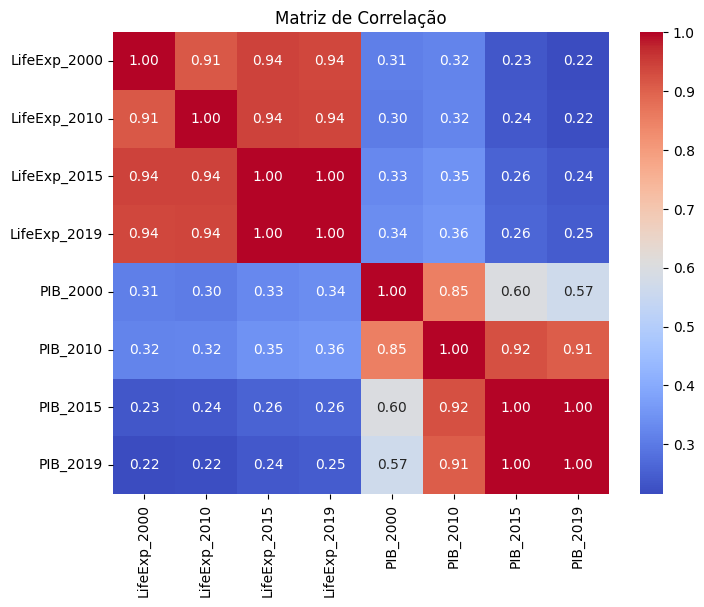

In [97]:
colunas_strings = pib_merge.select_dtypes(include=['object'])

nomes_colunas_strings = colunas_strings.columns.tolist()

df_matriz = pib_merge.drop(columns=nomes_colunas_strings)

df_matriz = pib_merge.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(df_matriz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlação')

plt.show()

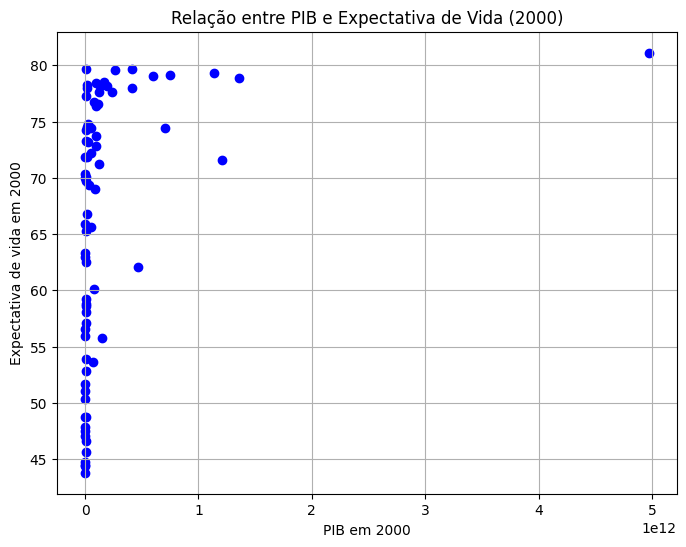

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(pib_merge["PIB_2000"], pib_merge["LifeExp_2000"], color='b')

plt.xlabel('PIB em 2000')
plt.ylabel('Expectativa de vida em 2000')
plt.title('Relação entre PIB e Expectativa de Vida (2000)')

# Exibindo o gráfico
plt.grid(True)
plt.show()

In [109]:
t_stat_life_exp, p_value_life_exp = stats.ttest_1samp(pib_merge['LifeExp_2019'], pib_merge['LifeExp_2019'].mean())

# Realizando um teste t de Student para PIB em 2019
t_stat_pib, p_value_pib = stats.ttest_1samp(pib_merge['PIB_2019'], pib_merge['PIB_2019'].mean())

# Imprimindo o resultado do teste de hipótese para expectativa de vida
print("Resultado do Teste de Hipótese para Expectativa de Vida (2019):")
print("Estatística t para Expectativa de Vida:", t_stat_life_exp)
print("Valor p para Expectativa de Vida:", p_value_life_exp)

# Imprimindo o resultado do teste de hipótese para PIB
print("\nResultado do Teste de Hipótese para PIB (2019):")
print("Estatística t para PIB:", t_stat_pib)
print("Valor p para PIB:", p_value_pib)

# Calculando o intervalo de confiança para expectativa de vida em 2019
confidence_interval_life_exp = stats.t.interval(0.95, len(pib_merge['LifeExp_2019']) - 1, loc=pib_merge['LifeExp_2019'].mean(), scale=stats.sem(pib_merge['LifeExp_2019']))

# Calculando o intervalo de confiança para PIB em 2019
confidence_interval_pib = stats.t.interval(0.95, len(pib_merge['PIB_2019']) - 1, loc=pib_merge['PIB_2019'].mean(), scale=stats.sem(pib_merge['PIB_2019']))

# Imprimindo o intervalo de confiança para expectativa de vida
print("\nIntervalo de Confiança para Expectativa de Vida (95%):", confidence_interval_life_exp)

# Imprimindo o intervalo de confiança para PIB
print("Intervalo de Confiança para PIB (95%):", confidence_interval_pib)

Resultado do Teste de Hipótese para Expectativa de Vida (2019):
Estatística t para Expectativa de Vida: 0.0
Valor p para Expectativa de Vida: 1.0

Resultado do Teste de Hipótese para PIB (2019):
Estatística t para PIB: 0.0
Valor p para PIB: 1.0

Intervalo de Confiança para Expectativa de Vida (95%): (70.44387583798294, 74.2841241620171)
Intervalo de Confiança para PIB (95%): (150297567137.20764, 977408720008.8724)
